# Кластеризация ЕГЭ (8.5 если сделаны все задачи)

Рядом лежат экселевские таблицы с координатами точек. В 3 и 4 задаче используется манхетеское расстояние. В остальных Евклидово.

* Постройте Распределение точек
* Кластеризуйте руками
* Постройте Распределение точек, отметьте принадлежность кластеров цветами
* Найдите среди в каждом кластере точку расстояние от которой до всех остальных минимально
* Выведите усреднение центров всех кластеров * 1000

In [236]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [237]:
def points(df):
    plt.figure(figsize=(10, 8))
    plt.scatter(df['X'], df['Y'], s=50, alpha=0.6, edgecolors='k')
    plt.title('Распределение точек', fontsize=14)
    plt.xlabel('X координата')
    plt.ylabel('Y координата')
    plt.grid(True, alpha=0.3)
    plt.show()

In [238]:
def cluster_points(n, df):
    colors = ['red', 'blue', 'green']
    for cluster_num in range(n):
        cluster_data = df[df['cluster'] == cluster_num]
        plt.scatter(cluster_data['X'], cluster_data['Y'], 
                    s=50, alpha=0.6, edgecolors='k',
                    color=colors[cluster_num], 
                    label=f'Кластер {cluster_num}')
    plt.title('Распределение точек с кластеризацией', fontsize=14)
    plt.xlabel('X координата')
    plt.ylabel('Y координата')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

In [239]:
def central_point_in_cluster(cluster_data):
    points = cluster_data[['X', 'Y']].values
    dist_matrix = cdist(points, points, metric='euclidean')
    sum_distances = np.sum(dist_matrix, axis=1)
    central_idx = np.argmin(sum_distances)
    return {
        'X': points[central_idx, 0],
        'Y': points[central_idx, 1],
        'avg_distance': sum_distances[central_idx] / (len(points) - 1)
    }


In [240]:
def central_point_in_clusters(n, df):
    central_points = []
    cluster_centers = []
    
    for i in range(n):
        cluster_data = df[df['cluster'] == i]
        
        if len(cluster_data) > 0:
            central_point = find_central_point_in_cluster(cluster_data)
            central_points.append(central_point)
            
            cluster_center = {
                'X': cluster_data['X'].mean(),
                'Y': cluster_data['Y'].mean(),
                'cluster': i
            }
            cluster_centers.append(cluster_center)
            
            print('Кластер', i)
            print('Центральная точка:')
            print(round(central_point['X'],3), round(central_point['Y'], 3))
            print('Среднее расстояние - ', round(central_point['avg_distance'], 3))
            print()
    return cluster_centers

In [241]:
def mid(cluster_centers):
    avg_center_x = np.mean([cc['X'] for cc in cluster_centers])
    avg_center_y = np.mean([cc['Y'] for cc in cluster_centers])
        
    result_x = avg_center_x * 1000
    result_y = avg_center_y * 1000
    
    print('Усреднение центров всех кластеров * 1000:')
    print(round(result_x, 2), round(result_y, 2))
    

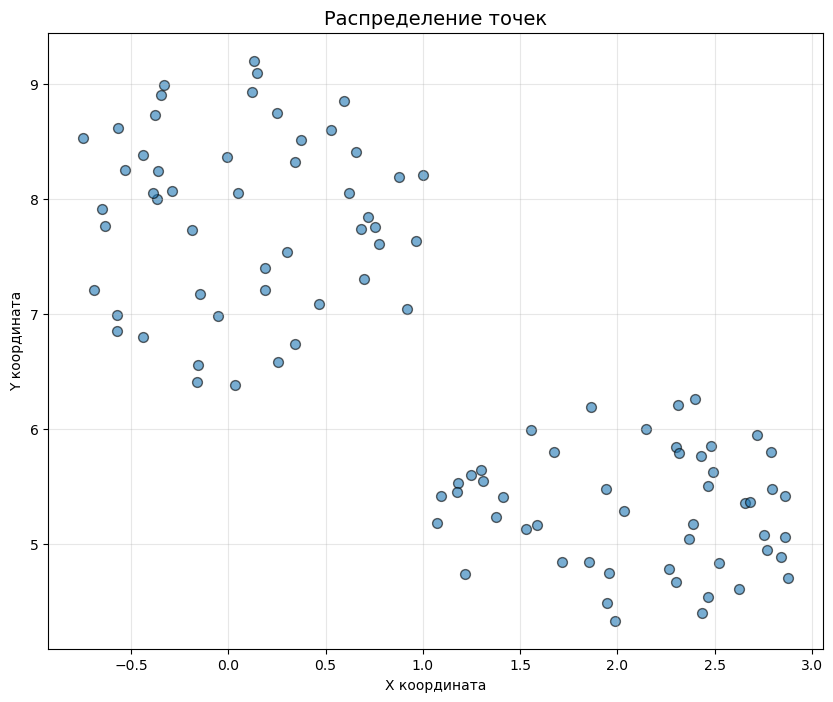

In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import warnings


data = pd.read_excel('0.xls')




df = pd.DataFrame(data)

points(df)

In [243]:
df['cluster'] = -1
x = df['X'].values
y = df['Y'].values
for i in range(len(df)):
    if y[i] <= 6.3 and x[i] >= 1.01:
        df.loc[i, 'cluster'] = 0
    else:
        df.loc[i, 'cluster'] = 1
      

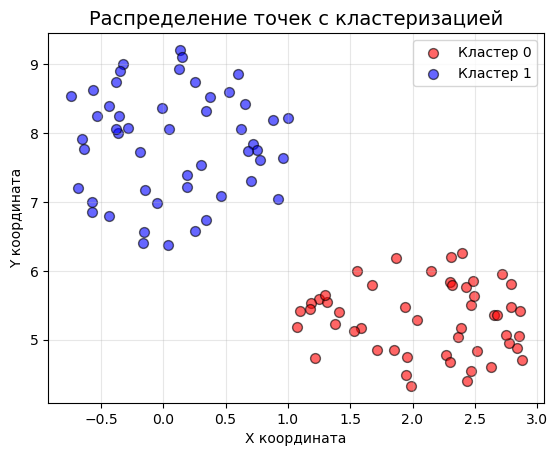

In [244]:
cluster_points(2, df)

In [245]:
cluster_centers = central_point_in_clusters(2, df)


Кластер 0
Центральная точка:
2.034 5.289
Среднее расстояние -  0.738

Кластер 1
Центральная точка:
0.048 8.053
Среднее расстояние -  0.884



In [246]:
mid(cluster_centers)

Усреднение центров всех кластеров * 1000:
1093.47 6575.71


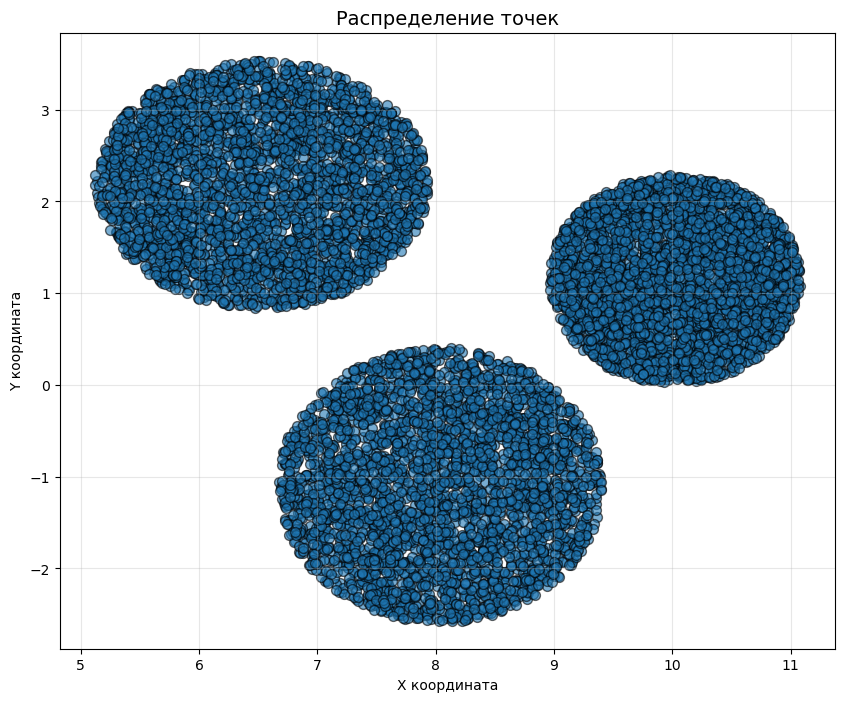

In [247]:
data = pd.read_excel('1.xls')




df = pd.DataFrame(data)

points(df)

In [248]:
df['cluster'] = -1
x = df['X'].values
y = df['Y'].values
for i in range(len(df)):
    if ((x[i]-8)**2 + (y[i]+1)**2) <= 1.6**2:
        df.loc[i, 'cluster'] = 0
    elif x[i] > 8.5:
        df.loc[i, 'cluster'] = 1
    else:
        df.loc[i, 'cluster'] = 2
        

print(df[['X', 'Y', 'cluster']].head(10))     

           X         Y  cluster
0   6.725530 -1.456108        0
1   8.470259 -1.600012        0
2   9.199621 -0.323936        0
3   8.893161 -0.932841        0
4   7.556105  1.419536        2
5   8.302529 -0.549266        0
6   9.730542  1.006963        1
7   9.289981  1.053314        1
8  10.253148  1.536787        1
9   9.386769  1.441708        1


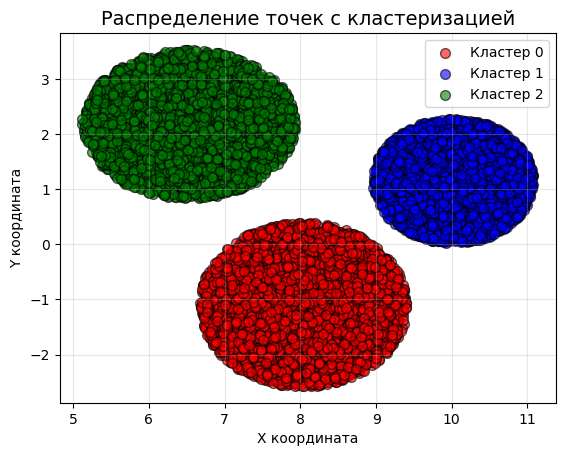

In [249]:
cluster_points(3, df)

In [250]:
cluster_centers = central_point_in_clusters(3, df)


Кластер 0
Центральная точка:
8.04 -1.109
Среднее расстояние -  0.954

Кластер 1
Центральная точка:
10.023 1.154
Среднее расстояние -  0.737

Кластер 2
Центральная точка:
6.47 2.17
Среднее расстояние -  0.926



In [251]:
mid(cluster_centers)

Усреднение центров всех кластеров * 1000:
8187.2 743.48


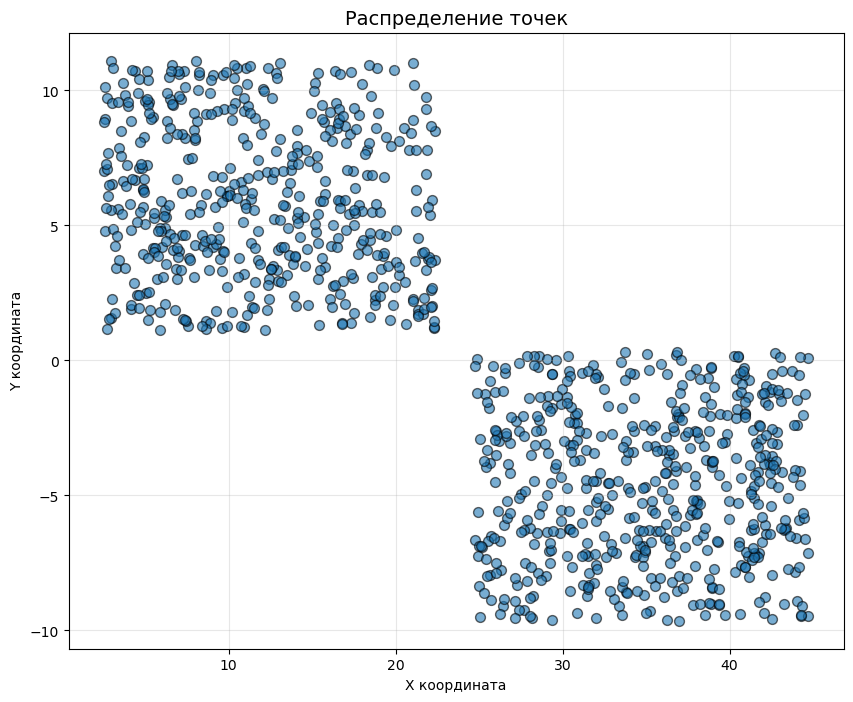

In [252]:
data = pd.read_excel('2.xlsx',  names=['X', 'Y'])


df = pd.DataFrame(data)
points(df)


In [253]:
df['cluster'] = -1
x = df['X'].values
y = df['Y'].values
for i in range(len(df)):
    if x[i] < 23:
        df.loc[i, 'cluster'] = 0
    else:
        df.loc[i, 'cluster'] = 1
        

print(df[['X', 'Y', 'cluster']].head(10))     

           X          Y  cluster
0  38.007549  -5.216876        1
1  13.725260   7.038423        0
2  11.076226  10.823751        0
3  29.097685  -4.983197        1
4  18.266608   7.796329        0
5  30.447081  -3.129231        1
6  30.237295  -1.355036        1
7  21.198200   5.537560        0
8  27.272551  -8.318681        1
9  13.707847   6.578963        0


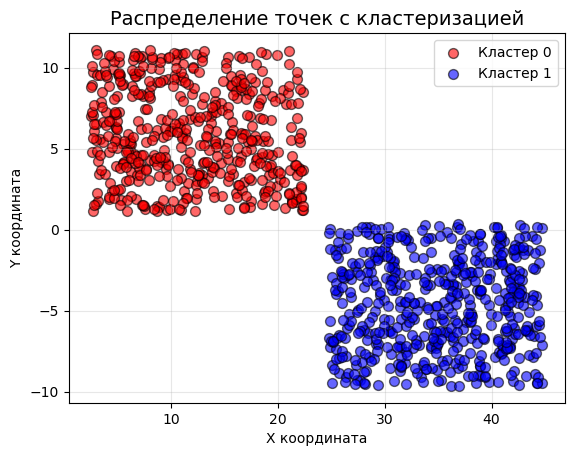

In [254]:
cluster_points(2, df)

In [255]:
cluster_centers = central_point_in_clusters(2, df)

Кластер 0
Центральная точка:
11.334 5.966
Среднее расстояние -  5.931

Кластер 1
Центральная точка:
34.926 -4.695
Среднее расстояние -  5.913



In [256]:
mid(cluster_centers)

Усреднение центров всех кластеров * 1000:
23387.76 645.64


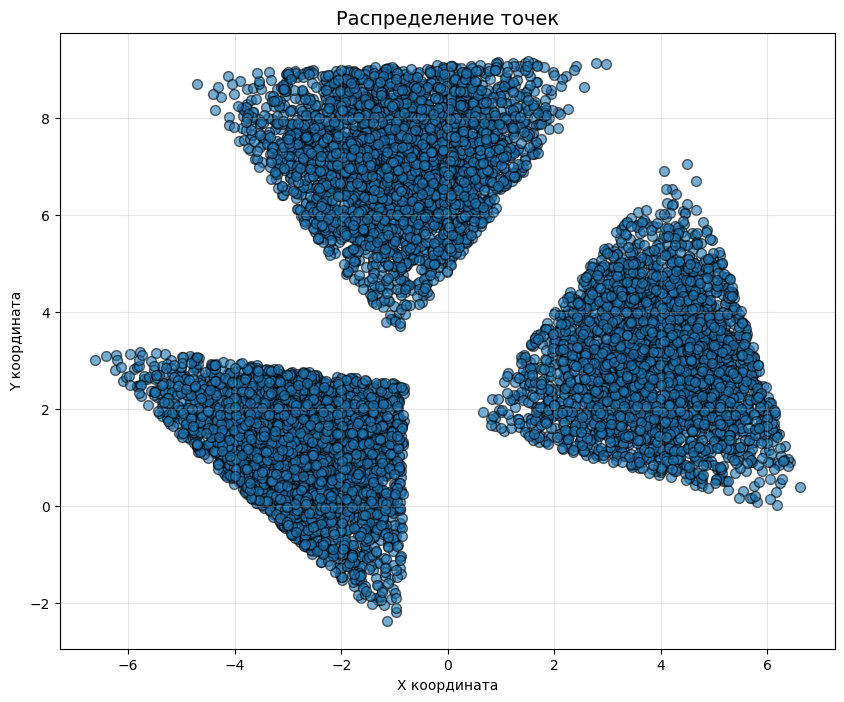

In [257]:
data = pd.read_excel('5.xlsx',  names=['X', 'Y'])


df = pd.DataFrame(data)
points(df)

In [258]:
df['cluster'] = -1
x = df['X'].values
y = df['Y'].values
for i in range(len(df)):
    if x[i] > 0:
        if ((x[i]-6)**2 + y[i]**2) <= 7.5**2:
            df.loc[i, 'cluster'] = 0
        else:
            df.loc[i, 'cluster'] = 1
    elif y[i] >= 3.7:
        df.loc[i, 'cluster'] = 1
    else:
        df.loc[i, 'cluster'] = 2
    
print(df[['X', 'Y', 'cluster']].head(10))     

          X         Y  cluster
0 -4.724692  1.785886        2
1 -1.018479  0.459319        2
2  2.051528  3.371585        0
3 -2.297699  8.196015        1
4 -3.471199  0.768029        2
5  1.734429  3.489507        0
6 -2.111764  0.199124        2
7 -0.791642  5.987820        1
8 -3.397044  1.668118        2
9 -1.728917  2.630307        2


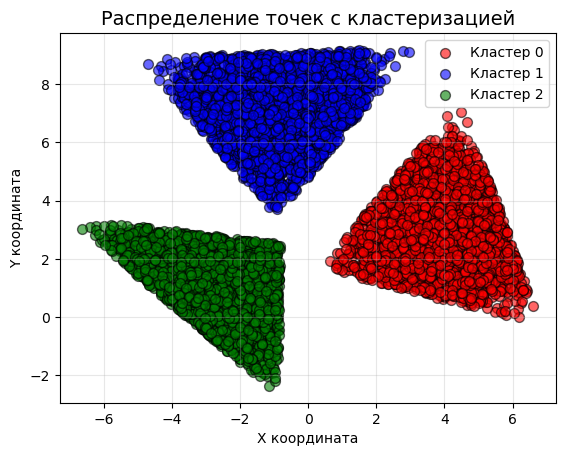

In [259]:
cluster_points(3, df)

In [260]:
cluster_centers = central_point_in_clusters(3, df)

Кластер 0
Центральная точка:
3.859 2.907
Среднее расстояние -  1.488

Кластер 1
Центральная точка:
-0.924 7.12
Среднее расстояние -  1.493

Кластер 2
Центральная точка:
-2.75 1.143
Среднее расстояние -  1.352



In [261]:
mid(cluster_centers)

Усреднение центров всех кластеров * 1000:
62.07 3741.03


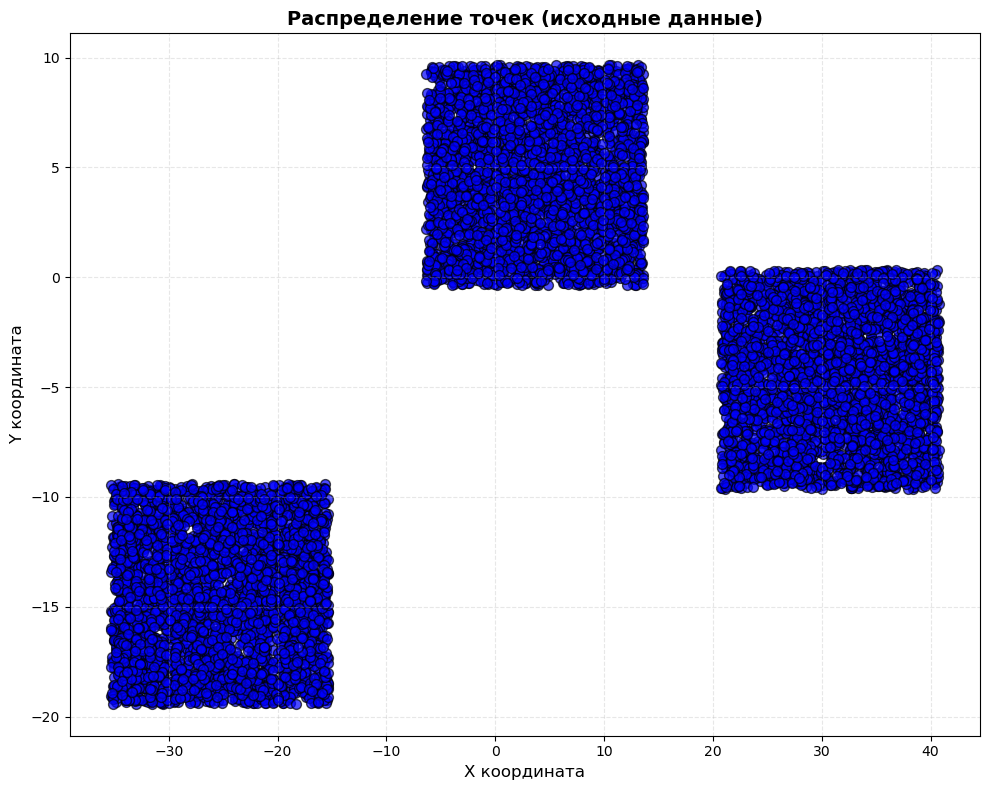

In [262]:
data = pd.read_excel('3.xlsx', names=['X','Y'])

df = pd.DataFrame(data)

plt.figure(figsize=(10, 8))
plt.scatter(df['X'], df['Y'], s=50, alpha=0.7, edgecolors='k', c='blue')
plt.title('Распределение точек (исходные данные)', fontsize=14, fontweight='bold')
plt.xlabel('X координата', fontsize=12)
plt.ylabel('Y координата', fontsize=12)
plt.grid(True, alpha=0.3, linestyle='--')



plt.tight_layout()
plt.show()

In [264]:
df['cluster'] = -1
x = df['X'].values
y = df['Y'].values
for i in range(len(df)):
    if x[i] < -10:
        df.loc[i, 'cluster'] = 0
    elif x[i] >= 20:
        df.loc[i, 'cluster'] = 2
    else:
        df.loc[i, 'cluster'] = 1
    


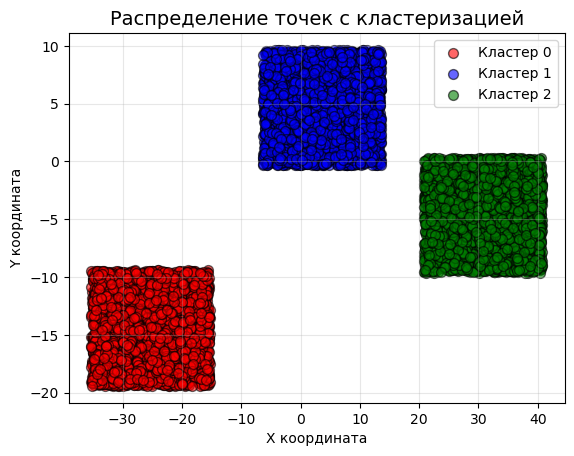

In [265]:
cluster_points(3, df)

In [266]:
def manhattan_distance_matrix(points):
    n = len(points)
    dist_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            dist_matrix[i, j] = np.sum(np.abs(points[i] - points[j]))
    return dist_matrix
def find_central_point_manhattan(cluster_points):
    points_array = cluster_points[['X', 'Y']].values
    indices = cluster_points.index.tolist()
    dist_matrix = manhattan_distance_matrix(points_array)
    sum_distances = np.sum(dist_matrix, axis=1)
    min_idx = np.argmin(sum_distances)
    return points_array[min_idx]


In [ ]:
central_points = []
cluster_centers = []

for i in range(3):
    cluster_data = df[df['cluster'] == i]
    central_point = find_central_point_manhattan(cluster_data)
    central_points.append(central_point)
    print('Кластер:', i)
    print(central_point)
    
   

In [ ]:

central_points_x = [central_points[i][0] for i in range(3)]
central_points_y = [central_points[i][1] for i in range(3)]

avg_central_x = np.mean(central_points_x)
avg_central_y = np.mean(central_points_y)



print(round(avg_central_x * 1000, 3), round(avg_central_y * 1000, 3))

In [ ]:
data = pd.read_excel('4.xlsx', names=['X','Y'])

df = pd.DataFrame(data)

plt.figure(figsize=(10, 8))
plt.scatter(df['X'], df['Y'], s=50, alpha=0.7, edgecolors='k', c='blue')
plt.title('Распределение точек (исходные данные)', fontsize=14, fontweight='bold')
plt.xlabel('X координата', fontsize=12)
plt.ylabel('Y координата', fontsize=12)
plt.grid(True, alpha=0.3, linestyle='--')



plt.tight_layout()
plt.show()

In [ ]:
df['cluster'] = -1
x = df['X'].values
y = df['Y'].values
for i in range(len(df)):
    if (x[i]+3)**2 + (y[i]-10)**2 < 7*7:
        df.loc[i, 'cluster'] = 0
    else:
        df.loc[i, 'cluster'] = 1
    
print(df[['X', 'Y', 'cluster']].head(10))

In [ ]:
cluster_points(2, df)

In [ ]:
central_points = []
cluster_centers = []

for i in range(2):
    cluster_data = df[df['cluster'] == i]
    central_point = find_central_point_manhattan(cluster_data)
    
    central_points.append(central_point)
    print('Кластер', i)
    print(central_point)
    

In [ ]:

central_points_x = [central_points[i][0] for i in range(2)]
central_points_y = [central_points[i][1] for i in range(2)]

avg_central_x = np.mean(central_points_x)
avg_central_y = np.mean(central_points_y)



print(round(avg_central_x * 1000, 3), round(avg_central_y * 1000, 3))

# Кластеризация (0.75 за каждый алгоритм на всех данных)

На предложенных распределениях данных проверьте предложенные алгоритмы. Постройте графики кластеризации для каждой пары алгоритм-данные, разные кластеры покрасьте разным цветом. Воспользуйтесь sklearn реализациями. Параметры кластеризации для разных алгоритмов подберите такие, чтобы алгоритмы можно было сравнивать (по возможности одинаковое количество кластеров и т.д.)

In [ ]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

In [ ]:
two_means =  
dbscan = 

clustering_algorithms = (
        ("MiniBatch\nKMeans", two_means),
        ("DBSCAN", dbscan),
    )

In [ ]:
np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 13))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.05, hspace=0.01
)

plot_num = 1

default_base = {
    "quantile": 0.3,
    "eps": 0.3,
    "damping": 0.9,
    "preference": -200,
    "n_neighbors": 10,
    "n_clusters": 3,
    "min_samples": 20,
    "xi": 0.05,
    "min_cluster_size": 0.1,
}

datasets = [
    (
        noisy_circles,
        {
            "damping": 0.77,
            "preference": -240,
            "quantile": 0.2,
            "n_clusters": 2,
            "min_samples": 20,
            "xi": 0.25,
        },
    ),
    (noisy_moons, {"damping": 0.75, "preference": -220, "n_clusters": 2}),
    (
        varied,
        {
            "eps": 0.18,
            "n_neighbors": 2,
            "min_samples": 5,
            "xi": 0.035,
            "min_cluster_size": 0.2,
        },
    ),
    (
        aniso,
        {
            "eps": 0.15,
            "n_neighbors": 2,
            "min_samples": 20,
            "xi": 0.1,
            "min_cluster_size": 0.2,
        },
    ),
    (blobs, {}),
    (no_structure, {}),
]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params["quantile"])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params["n_neighbors"], include_self=False
    )
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    for name, algorithm in clustering_algorithms:
        t0 = time.time()